# Zip Assesment 
# Code Created By Christina Bae

In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('orders.xlsx')
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626.0,26.0,95407.0,95407.0,1.0,1.0,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603.0,20.0,85007.0,85007.0,1.0,1.0,1.0,1.0
2,381AFF,793FE0,252600000000.0,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648.0,41.0,30305-2646,30305-2646,1.0,1.0,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625.0,33.0,28562.0,28562.0,1.0,1.0,1.0,1.0
4,237711.0,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438.0,18.0,92324.0,92324.0,1.0,1.0,1.0,1.0


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  float64       
 8   customer_age                10000 non-null  float64       
 9   customer_billing_zip        9989 non-null   object        
 10  customer_shipping_zip       9977 non-null   object        
 11  paid_installment_1          9998 non-null   float64    

(10000, 15)

In [4]:
# We can imputate the null values for the installment columns:
# Missing paid_installment_1 will be set to 1 assuming this payment must be made during the checkout.
# Missing paid_installment_3 and paid_installment_4 will be treated as Default (value 0).

df['paid_installment_1']=df['paid_installment_1'].fillna(1.0)
df['paid_installment_3']=df['paid_installment_3'].fillna(0.0)
df['paid_installment_4']=df['paid_installment_4'].fillna(0.0)

In [5]:
df.isnull().sum()

order_id                       0
customer_id                    0
merchant_id                    0
order_amount                   0
checkout_started_at            0
credit_decision_started_at     0
approved_for_installments      0
customer_credit_score          0
customer_age                   0
customer_billing_zip          11
customer_shipping_zip         23
paid_installment_1             0
paid_installment_2             0
paid_installment_3             0
paid_installment_4             0
dtype: int64

In [6]:
# Create the target variable, default

df['default'] = df['paid_installment_2']*df['paid_installment_3']*df['paid_installment_4']
df['default'] = np.where(df['default'] == 1.0, 0, 1)

In [7]:
# Sanity Check on the target variable

default_trans = df[df['default'] == 1]
print(default_trans.head(5))

          order_id         customer_id merchant_id  order_amount  \
7   306000000000.0              D0515B      6F498E         54.46   
9           7810F9              304B2B      9C0B17         80.00   
12        253247.0              D5DA42      6F498E         86.81   
13          E6E1D1  6790000000000000.0      4F01D6         74.25   
17          3FDDEE              E54B49      8D665E        131.25   

       checkout_started_at credit_decision_started_at  \
7  2018-09-27 23:49:18.743    2018-09-27 23:49:19.117   
9  2018-09-29 21:22:29.333    2018-09-29 21:22:29.677   
12 2018-10-07 18:32:47.260    2018-10-07 18:32:47.547   
13 2018-09-25 02:35:16.777    2018-09-25 02:35:19.807   
17 2018-10-06 22:54:04.553    2018-10-06 22:54:04.880   

    approved_for_installments  customer_credit_score  customer_age  \
7                        True                  486.0          25.0   
9                        True                  584.0          30.0   
12                       True         

In [8]:
df.default.value_counts()

0    8754
1    1246
Name: default, dtype: int64

# Explatory Data Analysis

In [9]:
# Extract Date and Time

df['checkout_weekday'] = df['checkout_started_at'].dt.weekday
df['checkout_hour'] = df['checkout_started_at'].dt.hour

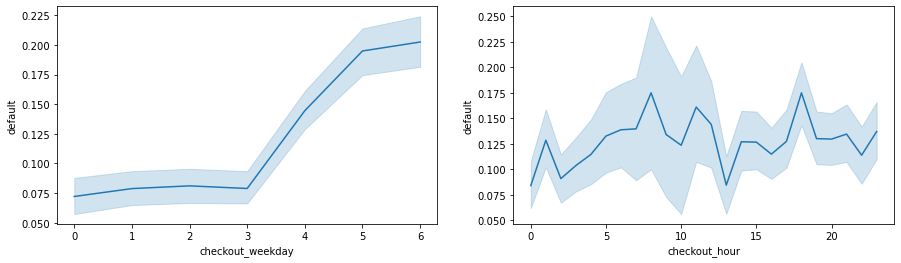

In [10]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.lineplot(
    data=df,
    x="checkout_weekday", y="default",
    markers=True, dashes=False
)
plt.subplot(1,2,2)
sns.lineplot(
    data=df,
    x="checkout_hour", y="default",
    markers=True, dashes=False
)
plt.show()

In [11]:
# Creating Weekend Flag (Friday, Sat, Sun)

df['weekend'] = df['checkout_weekday'].apply(lambda x: 1 if x >= 4 else 0)

In [12]:
from pandasql import sqldf 

In [13]:
mysql = lambda q: sqldf(q, globals())

In [14]:
# Customer Profiling

df['default_f'] = df['default']*1

# Calculate the total transaction counts per customer
# Calculate running transaction amount per customer

query = ''' SELECT
            *,
            row_number() over (partition by customer_id order by checkout_started_at) as running_trans,
            count(customer_id) over (partition by customer_id) as tot_trans,
            sum(default_f) over (partition by customer_id order by checkout_started_at) as running_default,
            sum(order_amount) over (partition by customer_id order by checkout_started_at) as running_tot_amt
            from df
            order by customer_id
    '''
df1 = mysql(query)

In [15]:
# Flag customers with previous default history

df1['prev_default'] = df1['running_default'].apply(lambda x: 1 if x >= 2 else 0)

In [16]:
df1.groupby(['prev_default','default']).size()

prev_default  default
0             0          8754
              1          1160
1             1            86
dtype: int64

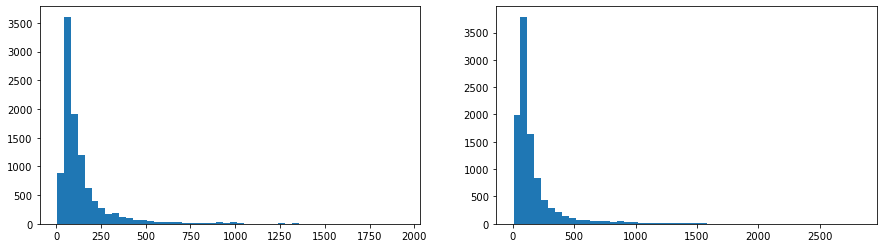

In [17]:
# Review Order Amount Distribution

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.hist(df1['order_amount'], bins=50)
plt.subplot(1,2,2)
plt.hist(df1['running_tot_amt'], bins=50)
plt.show()

In [20]:
# Merchant PRofile

query1 = ''' SELECT
            a.*,
            b.mc_avg_amt,
            b.mc_sales_cnt,
            b.risky_merch
            from df1 a
            left join ( Select merchant_id,
                        avg(order_amount) as mc_avg_amt,
                        count(order_id) as mc_sales_cnt,
                        sum(default_f) as risky_merch
                        from df
                        group by merchant_id) b
            on a.merchant_id = b.merchant_id
    '''
df2 = mysql(query1)

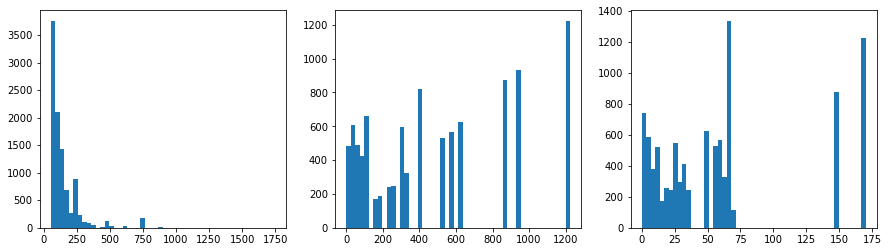

In [21]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.hist(df2['mc_avg_amt'], bins=50)
plt.subplot(1,3,2)
plt.hist(df2['mc_sales_cnt'], bins=50)
plt.subplot(1,3,3)
plt.hist(df2['risky_merch'], bins=50)
plt.show()

In [22]:
df2['mc_df_rate'] = df2['risky_merch']/df2['mc_sales_cnt']*100

In [23]:
# Comparing the customer billing zipcode and the shipping zipcode

df2['zip_match'] = df2['customer_billing_zip'] == df2['customer_shipping_zip']

In [24]:
df2['zip_match'].value_counts()

True     8686
False    1314
Name: zip_match, dtype: int64

In [25]:
zip_mismatch= df2[df2['zip_match'] == False]

In [26]:
zip_mismatch['default'].value_counts()

0    1163
1     151
Name: default, dtype: int64

In [27]:
# Investigating null zipcodes

null_billzip = df2[pd.isnull(df2['customer_billing_zip'])][['customer_billing_zip','default']]
print(null_billzip)

     customer_billing_zip  default
173                  None        0
1871                 None        0
2671                 None        0
2815                 None        0
3604                 None        0
3743                 None        1
3823                 None        0
4737                 None        0
7322                 None        0
7957                 None        0
9364                 None        0


In [28]:
null_shipzip = df2[pd.isnull(df2['customer_shipping_zip'])][['customer_shipping_zip','default']]
print(null_shipzip)

     customer_shipping_zip  default
173                   None        0
223                   None        0
1167                  None        0
1299                  None        0
1871                  None        0
2671                  None        0
2815                  None        0
3279                  None        0
3604                  None        0
3743                  None        1
3823                  None        0
4158                  None        0
4216                  None        0
4737                  None        0
4775                  None        0
4971                  None        0
5699                  None        0
5908                  None        0
6307                  None        0
7322                  None        0
7957                  None        0
9289                  None        0
9364                  None        0


In [29]:
# Only 1 default transaction is present (obs 2425). I am going to drop these transaction with the null values.

df2.dropna(inplace=True)

In [30]:
# Look at Describtive Statistics

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
order_amount,9977.0,146.181874,167.955578,4.950000,64.000000,90.780000,155.000000,1936.00
approved_for_installments,9977.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00
customer_credit_score,9977.0,613.396712,92.597807,1.000000,562.000000,611.000000,664.000000,836.00
customer_age,9977.0,33.558184,11.937229,18.000000,24.000000,30.000000,41.000000,89.00
paid_installment_1,9977.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00
paid_installment_2,9977.0,0.977849,0.147182,0.000000,1.000000,1.000000,1.000000,1.00
paid_installment_3,9977.0,0.959206,0.197822,0.000000,1.000000,1.000000,1.000000,1.00
paid_installment_4,9977.0,0.885938,0.317903,0.000000,1.000000,1.000000,1.000000,1.00
default,9977.0,0.124787,0.330494,0.000000,0.000000,0.000000,0.000000,1.00
checkout_weekday,9977.0,3.151248,1.910664,0.000000,2.000000,3.000000,5.000000,6.00


In [31]:
# Large Purchase Indicator

df2['large_purchase'] = df1['order_amount'].apply(lambda x: 1 if x >= 150 else 0)

In [32]:
# Treat Outliers 

features_with_outliers = ['order_amount', 'running_tot_amt', 'mc_avg_amt']
for feature in features_with_outliers:
    q1 = df2[feature].quantile(0.25)
    q3 = df2[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5) 
    upper_limit = q3 + (IQR*1.5) 
    df2.loc[df2[feature]<lower_limit,feature] = lower_limit
    df2.loc[df2[feature]>upper_limit,feature] = upper_limit

In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
order_amount,9977.0,120.480496,79.052303,4.950000,64.000000,90.780000,155.000000,291.50000
approved_for_installments,9977.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
customer_credit_score,9977.0,613.396712,92.597807,1.000000,562.000000,611.000000,664.000000,836.00000
customer_age,9977.0,33.558184,11.937229,18.000000,24.000000,30.000000,41.000000,89.00000
paid_installment_1,9977.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
paid_installment_2,9977.0,0.977849,0.147182,0.000000,1.000000,1.000000,1.000000,1.00000
paid_installment_3,9977.0,0.959206,0.197822,0.000000,1.000000,1.000000,1.000000,1.00000
paid_installment_4,9977.0,0.885938,0.317903,0.000000,1.000000,1.000000,1.000000,1.00000
default,9977.0,0.124787,0.330494,0.000000,0.000000,0.000000,0.000000,1.00000
checkout_weekday,9977.0,3.151248,1.910664,0.000000,2.000000,3.000000,5.000000,6.00000


In [34]:
# woe and information value
# Code copied from "https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html"

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [35]:
iv, woe = iv_woe(data = df2, target = 'default', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of order_id is 5.593574
      Variable  Cutoff  N  Events  % of Events  Non-Events  % of Non-Events  \
0     order_id     0.0  6       0     0.000402           6         0.000687   
1     order_id  0002CF  1       0     0.000402           1         0.000115   
2     order_id  0006D8  1       0     0.000402           1         0.000115   
3     order_id  000C40  1       0     0.000402           1         0.000115   
4     order_id  0018B3  1       1     0.000803           0         0.000057   
...        ...     ... ..     ...          ...         ...              ...   
9963  order_id  FFF0BC  1       0     0.000402           1         0.000115   
9964  order_id  FFF17E  1       0     0.000402           1         0.000115   
9965  order_id  FFF595  1       0     0.000402           1         0.000115   
9966  order_id  FFF7B8  1       0     0.000402           1         0.000115   
9967  order_id  FFFE7F  1       0     0.000402           1         0.000115   

         

In [36]:
# Variable Selection. 
# Excluding ID variables. 
# Excluding Age as it is a protected variable (fair lending regulartion)
# Excluding payment indicators
# Excluding Time stamps
# Excluding zipcodes
# Exlcuding Variables that are highly correlated with to other predictors (To address multicollinearity)

def var_select(df2):
    df2 = df2.drop(columns=['order_id', 'customer_id', 'merchant_id', 'checkout_started_at', 'credit_decision_started_at',
                            'approved_for_installments' , 'customer_billing_zip', 'customer_shipping_zip', 'paid_installment_1', 
                            'paid_installment_2', 'paid_installment_3', 'paid_installment_4', 'order_amount', 'running_tot_amt',
                            'running_default', 'running_trans', 'checkout_weekday', 'checkout_hour' , 'customer_age', 'default_f',
                            'risky_merch'])
    
    return df2

df_model = var_select (df2)

df_model.head()

,customer_credit_score,default,weekend,tot_trans,prev_default,mc_avg_amt,mc_sales_cnt,mc_df_rate,zip_match,large_purchase
0,632.0,0,1,3,0,253.524518,529,10.396975,True,0
1,611.0,0,0,3,0,92.371783,415,7.469880,True,1
2,593.0,0,0,3,0,87.642612,934,6.959315,True,0
3,711.0,0,0,2,0,253.524518,529,10.396975,True,1
4,711.0,0,0,2,0,253.524518,529,10.396975,True,1


<AxesSubplot:>

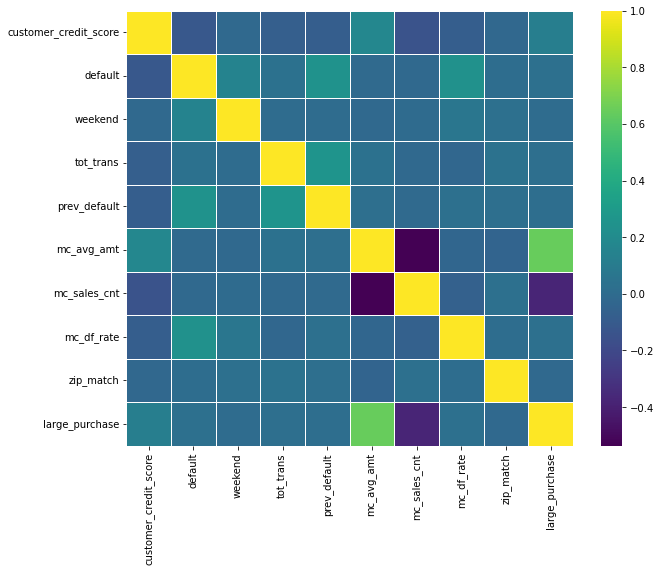

In [38]:
# Correlation Plot to check for multicollinearity

plt.figure(figsize=(10,8))
sns.heatmap(df_model.corr(), linewidths=0.5, annot= False, fmt='.2f', cmap = 'viridis')

In [41]:
# Interaction terms to explore

df_model['pd_num'] = df_model['prev_default'].astype(str).astype(int)

df_model['pd_trans'] = df_model.pd_num * df_model.tot_trans
df_model['weekend_mcdf'] = df_model.weekend * df2.mc_df_rate

df_model.drop(['pd_num'], axis=1, inplace=True)

# Model Fitting

In [42]:
# Voting Model comparing Logistic Regression, Support Vector Machine, Random Forest.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.inspection import PartialDependenceDisplay

In [43]:
# Down-sampling

df_majority = df_model[df_model.default==0]
df_minority = df_model[df_model.default==1]

df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=1300,
                                  random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.default.value_counts()

0    1300
1    1245
Name: default, dtype: int64

In [44]:
x = df_downsampled.drop('default', axis = 1)
y = df_downsampled['default']

In [45]:
sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(sc_x,y)

In [47]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()
voting = VotingClassifier(
    estimators = [('Logistic_Regression', log), ('Random_Forest', rnd), ('Support_Vector', svm)], voting = 'hard')

In [48]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Random_Forest', RandomForestClassifier()),
                             ('Support_Vector', SVC())])

In [49]:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

LogisticRegression 0.6813186813186813
RandomForestClassifier 0.6357927786499215
SVC 0.6907378335949764
VotingClassifier 0.6970172684458399


In [50]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [51]:
# I am going to start with 0.1 learning rate. Tune Tree-based Parameters.

gbm = XGBClassifier(
    learning_rate = 0.1,
    objective= 'binary:logistic',
    nthread=4,
    seed=21,
    use_label_encoder=False)

parameters1 = { 
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'max_depth': range (3, 10, 1),
    'min_child_weight':range(1,6,2),
    'n_estimators': range(60, 220, 40)}

grid_search1 = GridSearchCV(
    estimator=gbm,
    param_grid=parameters1,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

grid_search1.fit(x_train,y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits
[16:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=21, subsample=None, tree_method=None,
                                     use_label_encoder=

In [52]:
grid_search1.best_params_, grid_search1.best_score_

({'colsample_bytree': 0.9,
  'max_depth': 3,
  'min_child_weight': 1,
  'n_estimators': 60,
  'subsample': 0.6},
 0.7496912926330724)

In [53]:
gbm2 = XGBClassifier(
    learning_rate = 0.1,
    colsample_bytree = 0.9,
    max_depth = 3,
    min_child_weight = 1,
    n_estimators = 60,
    subsample = 0.6,
    objective= 'binary:logistic',
    nthread=4,
    seed=21,
    use_label_encoder=False)

gbm2.fit(x_train,y_train)
y_pred = gbm2.predict(x_test)
print(accuracy_score(y_test, y_pred)) 

[16:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7048665620094191


In [54]:
# Tune gamma

parameters2 = {'gamma':[i/10.0 for i in range(0,5)]}

grid_search2 = GridSearchCV(
    estimator=gbm2,
    param_grid=parameters2,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

grid_search2.fit(x_train,y_train)

grid_search2.best_params_, grid_search2.best_score_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[16:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'gamma': 0.0}, 0.7496912926330724)

In [56]:
gbm3 = XGBClassifier(
    learning_rate = 0.1,
    colsample_bytree = 0.9,
    max_depth = 3,
    min_child_weight = 1,
    n_estimators = 60,
    subsample = 0.6,
    gamma = 0,
    objective= 'binary:logistic',
    nthread=4,
    seed=21,
    use_label_encoder=False)

gbm3.fit(x_train,y_train)
y_pred = gbm3.predict(x_test)
print(accuracy_score(y_test, y_pred)) 

[16:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7048665620094191


In [57]:
# Tune regularization parameters

parameters3 =  {'reg_alpha':[0, 0.0001, 0.001, 0.005, 0.01, 0.05]}

grid_search3 = GridSearchCV(
    estimator=gbm3,
    param_grid=parameters3,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

grid_search3.fit(x_train,y_train)

grid_search3.best_params_, grid_search3.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[16:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 0}, 0.7496912926330724)

In [58]:
gbm4 = XGBClassifier(
    learning_rate = 0.1,
    colsample_bytree = 0.9,
    max_depth = 3,
    min_child_weight = 1,
    n_estimators = 60,
    subsample = 0.6,
    gamma = 0,
    reg_alpha = 0,
    objective= 'binary:logistic',
    nthread=4,
    seed=21,
    use_label_encoder=False)

gbm4.fit(x_train,y_train)
y_pred = gbm4.predict(x_test)
print(accuracy_score(y_test, y_pred)) 

[16:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7048665620094191


In [61]:
# Try Reducing the learning rate

gbm5 = XGBClassifier(
    learning_rate = 0.05,
    colsample_bytree = 0.9,
    max_depth = 3,
    min_child_weight = 1,
    n_estimators = 60,
    subsample = 0.6,
    gamma = 0,
    reg_alpha = 0,
    objective= 'binary:logistic',
    nthread=4,
    seed=21,
    use_label_encoder=False)

gbm5.fit(x_train,y_train)
y_pred = gbm5.predict(x_test)
print(accuracy_score(y_test, y_pred)) 

[16:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7095761381475667


In [62]:
# Look at feature Importance

importances = gbm5.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

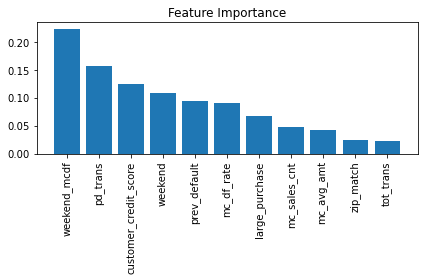

In [63]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

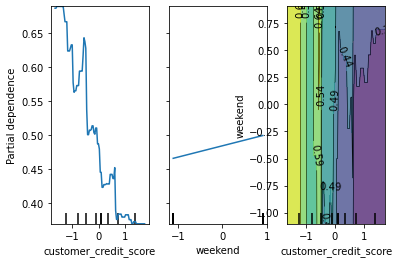

In [64]:
# Partial Dependecy Plot

features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(gbm4, x_train, features)

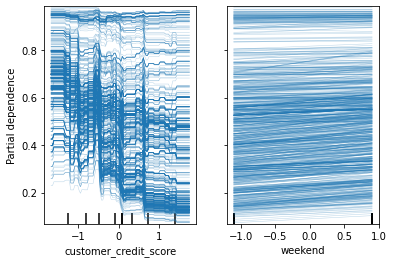

In [65]:
# Individual Conditional Expectation Plot

features = [0, 1]
PartialDependenceDisplay.from_estimator(gbm4, x_train, features,kind='individual')

In [ ]:
# Model Accuracy Comparison:
'''
LogisticRegression 0.6813186813186813
RandomForestClassifier 0.6357927786499215
SVC 0.6907378335949764
VotingClassifier 0.6970172684458399
XGBoost: 0.7095761381475667
'''
#  WE have a new champion model. XGBoost
# Top three predictors are: weekend*mc_default_rate, previous_default*cust_tot_trans, and customer_credit_score